In [33]:
# 1. set up the database
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Database created and connected!
Cursor created!


In [ ]:
# prompt: delete existing tables

# Delete the table if it exists
cursor.execute("DROP TABLE IF EXISTS students")
connection.commit()


In [34]:
# 2. create the necessary tables
cursor.execute("DROP TABLE IF EXISTS students")
cursor.execute("DROP TABLE IF EXISTS grades")
# Create the students table
cursor.execute('''
CREATE TABLE students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("students table created!")

# Create the grades table
cursor.execute('''
CREATE TABLE grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("grades table created!")

students table created!
grades table created!


In [35]:
# 3. insert data into the tables

# Sample data to insert into the students table (omit student_id)
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

# Insert data into the students table (omit student_id in the insert statement)
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)
connection.commit()
print("Data inserted into the students table!")

# Sample data to insert into the grades table
grades_data = [
    (1, 'Math', 90),
    (1, 'English', 85),
    (1, 'History', 78),
    (2, 'Math', 88),
    (2, 'English', 92),
    (2, 'History', 89),
    (3, 'Math', 76),
    (3, 'English', 82),
    (3, 'History', 91),
    (4, 'Math', 85),
    (4, 'English', 90),
    (4, 'History', 87),
    (5, 'Math', 92),
    (5, 'English', 88),
    (5, 'History', 93)
]

# Insert data into the grades table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)
connection.commit()
print("Data inserted into the grades table!")

Data inserted into the students table!
Data inserted into the grades table!


In [36]:
# 4. perform sql queries

# 1. Retrieve all students' name and their grades
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students JOIN grades
    ON students.student_id = grades.student_id''')
rows = cursor.fetchall()

# Print the results
print("Students and their grades:")
for row in rows:
    print(row)

Students and their grades:
('Alice', 'Johnson', 'Math', 90)
('Alice', 'Johnson', 'English', 85)
('Alice', 'Johnson', 'History', 78)
('Bob', 'Smith', 'Math', 88)
('Bob', 'Smith', 'English', 92)
('Bob', 'Smith', 'History', 89)
('Carol', 'White', 'Math', 76)
('Carol', 'White', 'English', 82)
('Carol', 'White', 'History', 91)
('David', 'Brown', 'Math', 85)
('David', 'Brown', 'English', 90)
('David', 'Brown', 'History', 87)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 88)
('Eve', 'Davis', 'History', 93)


In [37]:
# 2. Find the average grade for each student
cursor.execute('''
    SELECT students.first_name, students.last_name,
    AVG(grades.grade) FROM students JOIN grades
    ON students.student_id = grades.student_id
    GROUP BY students.student_id''')

rows = cursor.fetchall()

# Print the results
print("Average grades for each student:")
for row in rows:
    print(row)

Average grades for each student:
('Alice', 'Johnson', 84.33333333333333)
('Bob', 'Smith', 89.66666666666667)
('Carol', 'White', 83.0)
('David', 'Brown', 87.33333333333333)
('Eve', 'Davis', 91.0)


In [38]:
# 3. Find the student with highest average grade
cursor.execute('''
    SELECT students.first_name, students.last_name,
    AVG(grades.grade) FROM students JOIN grades
    ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY AVG(grades.grade) DESC
    LIMIT 1
    ''')

rows = cursor.fetchall()

# Print the results
print("Average grades for each student:")
for row in rows:
    print(row)

Average grades for each student:
('Eve', 'Davis', 91.0)


In [39]:
# 4. Find the average grade for the Math subject
cursor.execute('''
    SELECT students.first_name, students.last_name,
    AVG(grades.grade) FROM students JOIN grades
    ON students.student_id = grades.student_id
    GROUP BY grades.subject
    HAVING grades.subject = 'Math'
    ''')

rows = cursor.fetchall()

# Print the results
print("Average grades for each student:")
for row in rows:
    print(row)

Average grades for each student:
('Alice', 'Johnson', 86.2)


In [42]:
# 5. List all students who scored above 90 in any subject
cursor.execute('''
    SELECT students.first_name, students.last_name,
    grades.subject, grades.grade FROM students JOIN grades
    ON students.student_id = grades.student_id
    WHERE grades.grade > 90
    ''')

rows = cursor.fetchall()

# Print the results
print("Average grades for each student:")
for row in rows:
    print(row)

Average grades for each student:
('Bob', 'Smith', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'History', 93)


In [44]:
# 5. load data into pandas

import pandas as pd

# Query the students data into a DataFrame
df = pd.read_sql_query('SELECT * FROM students JOIN grades ON students.student_id = grades.student_id', connection)

# Display the DataFrame
df.head()

,student_id,first_name,last_name,grade_id,student_id,subject,grade
0,1,Alice,Johnson,1,1,Math,90
1,1,Alice,Johnson,2,1,English,85
2,1,Alice,Johnson,3,1,History,78
3,2,Bob,Smith,4,2,Math,88
4,2,Bob,Smith,5,2,English,92


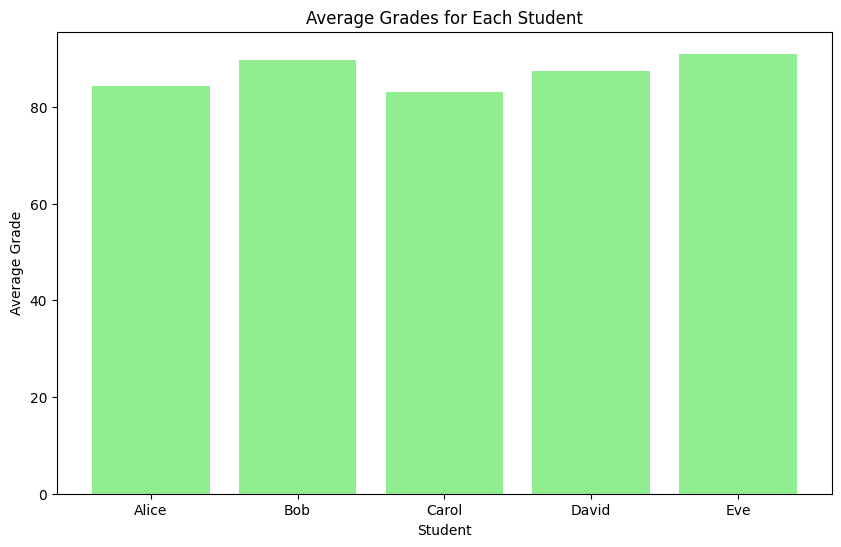

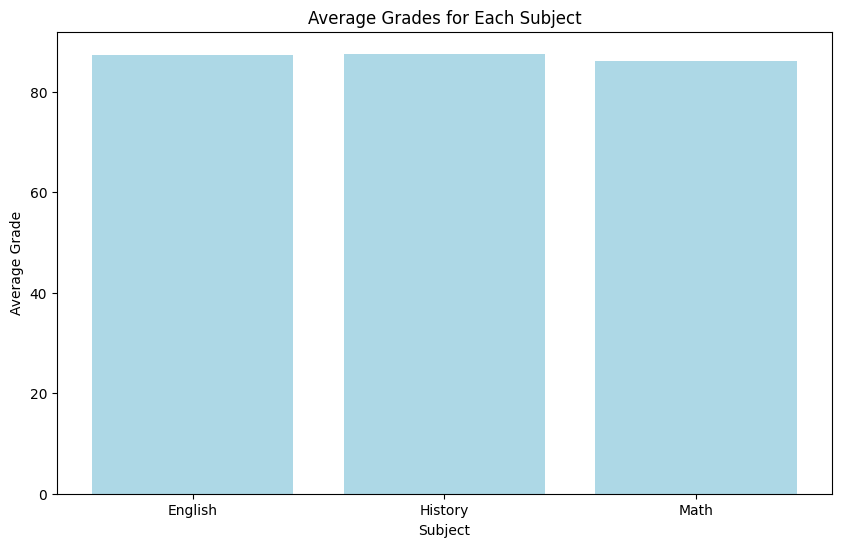

In [46]:
# visualize the data
import matplotlib.pyplot as plt

# Plot average grades for each student data
avg_grades = df.groupby('first_name')['grade'].mean()
students = avg_grades.index

plt.figure(figsize=(10,6))
plt.bar(students, avg_grades, color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

# Create a bar chart showing the average grade for each subject
avg_grades = df.groupby('subject')['grade'].mean()
subjects = avg_grades.index

plt.figure(figsize=(10,6))
plt.bar(subjects, avg_grades, color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')
plt.show()